Simple data analysis project using SQLite, pandas, and matplotlib to summarize and visualize sales of clothing items.


In [1]:
import sqlite3

conn = sqlite3.connect("clothing_sales.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ("T-Shirt", 5, 300.0),
    ("Jeans", 2, 1200.0),
    ("Hoodie", 3, 800.0),
    ("T-Shirt", 4, 300.0),
    ("Cap", 6, 150.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()

print("Clothing sales data inserted into clothing_sales.db.")


Clothing sales data inserted into clothing_sales.db.


In [2]:
import pandas as pd

conn = sqlite3.connect("clothing_sales.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

df


,product,total_qty,revenue
0,Cap,6,900.0
1,Hoodie,3,2400.0
2,Jeans,2,2400.0
3,T-Shirt,9,2700.0


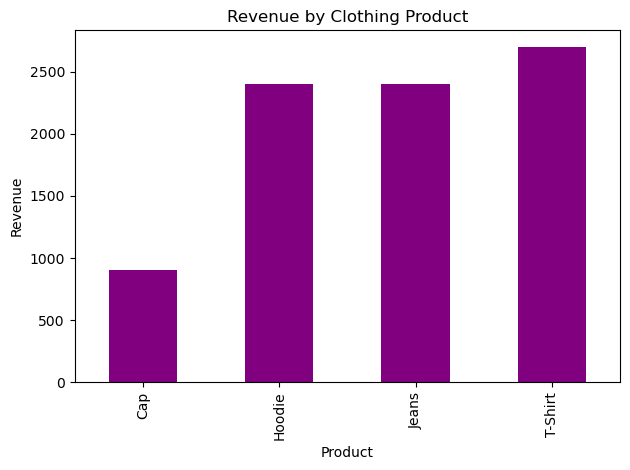

In [3]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', color='purple', legend=False)
plt.title("Revenue by Clothing Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
